In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle

import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\toppi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\toppi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\toppi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\toppi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_csv('sample_data/reddit_wsb.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [5]:
df.drop_duplicates(subset ="title", keep = "first", inplace = True)

In [6]:
df.shape

(49236, 8)

In [7]:
df['title'] = df['title'].astype('str')

In [8]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df['title'].apply(get_polarity)

In [9]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [10]:
df['Sentiment_Type'].value_counts()

NEUTRAL     28107
POSITIVE    12273
NEGATIVE     8856
Name: Sentiment_Type, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}>

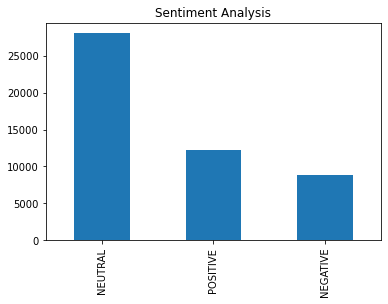

In [11]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [12]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [13]:
# Let's take a look at the updated text
df['title'] = pd.DataFrame(df.title.apply(cleaned))
df.head(10)

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type
0,its not about the money its about sending a me...,55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,0.000000,NEUTRAL
1,math professor scott steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,0.000000,NEUTRAL
2,exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,0.000000,NEUTRAL
3,new sec filing for gme can someone less retard...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,-0.238826,NEGATIVE
4,not to distract from gme just thought our amc ...,71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,0.250000,POSITIVE
5,we breaking through,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,0.000000,NEUTRAL
6,short stock doesnt have an expiration date,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,0.000000,NEUTRAL
7,this is the moment,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,0.000000,NEUTRAL
8,currently holding amc and nok is it retarded ...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,-0.400000,NEGATIVE
9,i have nothing to say but bruh i am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37,0.000000,NEUTRAL


In [14]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\toppi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
df['score'] = df['title'].apply(lambda title: sid.polarity_scores(title))

df.head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type
0,its not about the money its about sending a me...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,0.000000,NEUTRAL
1,math professor scott steiner says the numbers ...,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,0.000000,NEUTRAL
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,0.000000,NEUTRAL
3,new sec filing for gme can someone less retard...,"{'neg': 0.204, 'neu': 0.658, 'pos': 0.138, 'co...",l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,-0.238826,NEGATIVE
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,0.250000,POSITIVE


In [16]:
df['compound']  = df['score'].apply(lambda score_dict: score_dict['compound'])

#df.head()

In [17]:
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [18]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type
0,its not about the money its about sending a me...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,0.000000,NEUTRAL,0.0000,NEUTRAL
1,math professor scott steiner says the numbers ...,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,0.000000,NEUTRAL,-0.6249,NEGATIVE
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,0.000000,NEUTRAL,0.0000,NEUTRAL
3,new sec filing for gme can someone less retard...,"{'neg': 0.204, 'neu': 0.658, 'pos': 0.138, 'co...",l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,-0.238826,NEGATIVE,-0.2748,NEGATIVE
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,0.250000,POSITIVE,0.2235,POSITIVE


In [19]:
df['sentiment_type'].value_counts()

NEUTRAL     22382
POSITIVE    15737
NEGATIVE    11117
Name: sentiment_type, dtype: int64

<AxesSubplot:title={'center':'sentiment analysis'}>

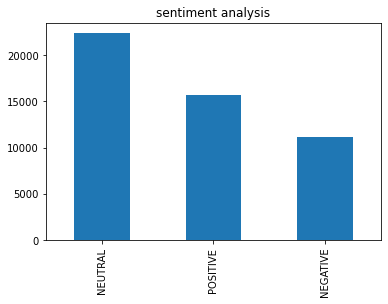

In [20]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [21]:
df[df['sentiment_type'] == 'NEGATIVE'].head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type
1,math professor scott steiner says the numbers ...,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,0.000000,NEUTRAL,-0.6249,NEGATIVE
3,new sec filing for gme can someone less retard...,"{'neg': 0.204, 'neu': 0.658, 'pos': 0.138, 'co...",l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,-0.238826,NEGATIVE,-0.2748,NEGATIVE
8,currently holding amc and nok is it retarded ...,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,-0.400000,NEGATIVE,-0.5719,NEGATIVE
18,words brought to you by the fuckers at the sec,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp...",l6u2x7,https://i.redd.it/r4ja2vj922e61.jpg,41,1.611861e+09,NaN,2021-01-28 21:05:01,-0.100000,NEGATIVE,-0.5994,NEGATIVE
21,we need to stick together and 💎🖐 the ever lovi...,"{'neg': 0.224, 'neu': 0.672, 'pos': 0.104, 'co...",l6two5,https://www.reddit.com/r/wallstreetbets/commen...,323,1.611860e+09,This is our time. If anyone will listen to you...,2021-01-28 20:54:08,-0.490625,NEGATIVE,-0.4118,NEGATIVE


In [22]:
df[df['sentiment_type'] == 'POSITIVE'].head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type
4,not to distract from gme just thought our amc ...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,0.25,POSITIVE,0.2235,POSITIVE
11,gme premarket 🍁 musk approved 🎮🛑💎✋,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",l6ua2q,https://i.redd.it/48rmgz5c42e61.png,97,1.611861e+09,NaN,2021-01-28 21:17:28,0.00,NEUTRAL,0.4215,POSITIVE
14,i love you retards,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",l6u8hc,https://www.reddit.com/gallery/l6u8hc,32,1.611861e+09,NaN,2021-01-28 21:14:44,-0.25,NEGATIVE,0.6369,POSITIVE
23,im so proud of how far this subreddit has come,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",l6tuae,https://www.reddit.com/r/wallstreetbets/commen...,89,1.611860e+09,I still remember when I first joined and most ...,2021-01-28 20:49:39,0.45,POSITIVE,0.5256,POSITIVE
26,i’ve got a friend who is all in on gme 🚀💎🙌🏼,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",l6tsx4,https://i.redd.it/hgrgffo1z1e61.jpg,43,1.611860e+09,NaN,2021-01-28 20:46:58,0.00,NEUTRAL,0.4939,POSITIVE


In [23]:
df[df['sentiment_type'] == 'NEUTRAL'].head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type
0,its not about the money its about sending a me...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,0.0,NEUTRAL,0.0,NEUTRAL
2,exit the system,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,0.0,NEUTRAL,0.0,NEUTRAL
5,we breaking through,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,0.0,NEUTRAL,0.0,NEUTRAL
6,short stock doesnt have an expiration date,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,0.0,NEUTRAL,0.0,NEUTRAL
7,this is the moment,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,0.0,NEUTRAL,0.0,NEUTRAL


In [24]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [25]:
df['sentiment_type'].value_counts()

NEUTRAL     22382
POSITIVE    15737
NEGATIVE    11117
Name: sentiment_type, dtype: int64

In [26]:
df = df[pd.notnull(df['sentiment_type'])]
df = df.sample(frac=0.5, random_state=99).reset_index(drop=True)
df = shuffle(df, random_state=22)
df = df.reset_index(drop=True)
df['class_label'] = df['sentiment_type'].factorize()[0]
class_label_df = df[['sentiment_type', 'class_label']].drop_duplicates().sort_values('class_label')
label_to_id = dict(class_label_df.values)
id_to_label = dict(class_label_df[['class_label', 'sentiment_type']].values)

In [27]:
df.head(10)

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type,class_label
0,could this be the squeeze,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6yxxr,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611875e+09,Maybe I’m crazy but could this Robinhood shutd...,2021-01-29 01:03:02,0.000000,NEUTRAL,0.0000,NEUTRAL,0
1,robinhood blocking users from buying gme,"{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...",l6zjqk,https://i.redd.it/974cspwdc3e61.jpg,0,1.611876e+09,NaN,2021-01-29 01:23:32,0.000000,NEUTRAL,-0.3818,NEGATIVE,1
2,what is a good replacement for robinhood,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",l72hhi,https://www.reddit.com/r/wallstreetbets/commen...,5,1.611882e+09,After today there's no way I want them around ...,2021-01-29 03:05:45,0.700000,POSITIVE,0.4404,POSITIVE,2
3,wall street journal what a respectable source...,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",lbqtuh,https://i.redd.it/s0s3z9w6daf61.jpg,9,1.612397e+09,NaN,2021-02-04 02:04:38,0.433333,POSITIVE,0.7003,POSITIVE,2
4,cashapp is letting you buy amc again,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l720kp,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611881e+09,NaN,2021-01-29 02:50:16,0.000000,NEUTRAL,0.0000,NEUTRAL,0
5,amat dd and why semiconductor stocks are a gre...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",nwnysp,https://www.reddit.com/r/wallstreetbets/commen...,15,1.623361e+09,"As usual for me, I took some of my adderall pr...",2021-06-11 00:42:20,0.542857,POSITIVE,0.7579,POSITIVE,2
6,i never knew it was possible to lose this much...,"{'neg': 0.151, 'neu': 0.726, 'pos': 0.123, 'co...",lhxnp2,https://i.redd.it/48oihdoblxg61.jpg,375,1.613114e+09,NaN,2021-02-12 09:15:20,0.100000,POSITIVE,-0.1280,NEGATIVE,1
7,comprehensive list of alternative trading plat...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",l6wxzz,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611870e+09,"Please try to get this to the top, and post ev...",2021-01-28 23:45:19,0.000000,NEUTRAL,0.2500,POSITIVE,2
8,yolo on the ugly stepsister of gme and meme st...,"{'neg': 0.246, 'neu': 0.597, 'pos': 0.157, 'co...",m3rhm7,https://i.redd.it/28st8fhhznm61.jpg,12,1.615613e+09,NaN,2021-03-13 07:21:42,-0.700000,NEGATIVE,-0.2960,NEGATIVE,1
9,how long did it take you to become less riskav...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",n7us6r,https://www.reddit.com/r/wallstreetbets/commen...,137,1.620526e+09,"I’m totally new to the investing/trading game,...",2021-05-09 05:01:56,-0.108333,NEGATIVE,0.0000,NEUTRAL,0


In [28]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
   # text = BeautifulSoup(text, "lxml").text # HTML decoding. BeautifulSoup's text attribute will return a string stripped of any HTML tags and metadata.
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['title'] = df['title'].apply(clean_text)

In [29]:
df['class_label'].value_counts()

0    11230
2     7849
1     5539
Name: class_label, dtype: int64

In [30]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,Polarity,Sentiment_Type,compound,sentiment_type,class_label
0,could squeeze,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l6yxxr,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611875e+09,Maybe I’m crazy but could this Robinhood shutd...,2021-01-29 01:03:02,0.000000,NEUTRAL,0.0000,NEUTRAL,0
1,robinhood blocking users buying gme,"{'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'comp...",l6zjqk,https://i.redd.it/974cspwdc3e61.jpg,0,1.611876e+09,NaN,2021-01-29 01:23:32,0.000000,NEUTRAL,-0.3818,NEGATIVE,1
2,good replacement robinhood,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",l72hhi,https://www.reddit.com/r/wallstreetbets/commen...,5,1.611882e+09,After today there's no way I want them around ...,2021-01-29 03:05:45,0.700000,POSITIVE,0.4404,POSITIVE,2
3,wall street journal respectable source news gm...,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",lbqtuh,https://i.redd.it/s0s3z9w6daf61.jpg,9,1.612397e+09,NaN,2021-02-04 02:04:38,0.433333,POSITIVE,0.7003,POSITIVE,2
4,cashapp letting buy amc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",l720kp,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611881e+09,NaN,2021-01-29 02:50:16,0.000000,NEUTRAL,0.0000,NEUTRAL,0


In [31]:
# to use for database on tableau dashboard
df.to_csv("sample_data/sentiment_wsb.csv")

In [32]:
list_corpus = df["title"].tolist()
list_labels = df["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)
vectorizer = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words = 'english', binary=True)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [33]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors, y_train)

C:\Users\toppi\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, n_jobs=1)

In [34]:
pred = logreg.predict(test_vectors)
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.819, precision = 0.817, recall = 0.819, f1 = 0.816


In [35]:
c = make_pipeline(vectorizer, logreg)
class_names=list(df.title.unique())
explainer = LimeTextExplainer(class_names=class_names)

In [36]:
class_names

['could squeeze',
 'robinhood blocking users buying gme',
 'good replacement robinhood',
 'wall street journal respectable source news gme sheds nearly good one',
 'cashapp letting buy amc',
 'amat dd semiconductor stocks great play right',
 'never knew possible lose much one day shares',
 'comprehensive list alternative trading platforms',
 'yolo ugly stepsister gme meme stocks',
 'long take become less riskaverse',
 'gme causing chain effect internationally everywhere',
 'hear short everything',
 'finally found pathway true change going guys',
 'added',
 'round go',
 'boys holding gme norway lets gooo buy fucking hold dipshits',
 'honestly whats wrong ge',
 'thanks sec knew cared notification rh',
 'risk tolerance exercise everyone gme',
 'current state gme',
 'amc short interest',
 'dont know happening point im afraid ask',
 'yolo account ready',
 'gamestop cfo resigns following meme stock frenzy',
 'updated picture hope works',
 'cant another gme michael burry',
 'could udeepfuckin

In [37]:
idx = 1877
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, labels=[0, 1])
print('Document id: %d' % idx)
print('Predicted class =', class_names[logreg.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[y_test[idx]])

Document id: 1877
Predicted class = robinhood blocking users buying gme
True class: robinhood blocking users buying gme


In [38]:
print ('Explanation for class %s' % class_names[0])
print ('\n'.join(map(str, exp.as_list(label=1))))

Explanation for class could squeeze
('rigged', 0.6243469276273401)
('frenzy', 0.34970152494566975)
('street', -0.1517926501211425)
('says', -0.14619521784334916)
('warren', -0.0983527249448769)
('game', -0.0724664749589186)


In [39]:
exp = explainer.explain_instance(X_test[idx], c.predict_proba, num_features=6, top_labels=2)
print(exp.available_labels())

[1, 0]


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import text



In [41]:
tags_split = [tags.split(',') for tags in df['title'].values]
print(tags_split[:10])

[['could squeeze'], ['robinhood blocking users buying gme'], ['good replacement robinhood'], ['wall street journal respectable source news gme sheds nearly good one'], ['cashapp letting buy amc'], ['amat dd semiconductor stocks great play right'], ['never knew possible lose much one day shares'], ['comprehensive list alternative trading platforms'], ['yolo ugly stepsister gme meme stocks'], ['long take become less riskaverse']]


In [42]:
tag_encoder = MultiLabelBinarizer()
tags_encoded = tag_encoder.fit_transform(tags_split)
num_tags = len(tags_encoded[0])
print(df['title'].values[0])
print(tag_encoder.classes_)
print(tags_encoded[0])

could squeeze
['' 'aa pre market' 'aaaaaall abooooaaaard' ... 'zrx next buy buy'
 'zubu client sentiment report market recap' 'zuo finally moon']
[0 0 0 ... 0 0 0]


In [43]:
train_size = int(len(df) * .8)
print('train size: %d' % train_size)
print('test size: %d' % (len(df) - train_size))

train size: 19694
test size: 4924


In [44]:
y_train = tags_encoded[: train_size]
y_test = tags_encoded[train_size:]

In [45]:
class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix

In [46]:
VOCAB_SIZE = 500
train_post = df['title'].values[: train_size]
test_post = df['title'].values[train_size: ]
processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(train_post)
X_train = processor.transform_text(train_post)
X_test = processor.transform_text(test_post)

In [47]:
print(len(X_train[0]))
print(X_train[0])

500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [48]:
def create_model(vocab_size, num_tags):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_shape = (VOCAB_SIZE,), activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(num_tags, activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
model = create_model(VOCAB_SIZE, num_tags)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                25050     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 23388)             608088    
Total params: 634,413
Trainable params: 634,413
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train, y_train, epochs = 15, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model.evaluate(X_test, y_test, batch_size = 128)))

Epoch 1/15
139/139 [==============================] - 9s 61ms/step - loss: 0.2823 - accuracy: 1.1284e-04 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 2/15
139/139 [==============================] - 8s 60ms/step - loss: 0.0048 - accuracy: 0.0031 - val_loss: 0.0024 - val_accuracy: 0.0041
Epoch 3/15
139/139 [==============================] - 8s 60ms/step - loss: 0.0017 - accuracy: 0.0054 - val_loss: 0.0013 - val_accuracy: 0.0041
Epoch 4/15
139/139 [==============================] - 8s 60ms/step - loss: 0.0011 - accuracy: 0.0054 - val_loss: 9.9493e-04 - val_accuracy: 0.0041
Epoch 5/15
139/139 [==============================] - 9s 62ms/step - loss: 8.9481e-04 - accuracy: 0.0054 - val_loss: 8.6453e-04 - val_accuracy: 0.0041
Epoch 6/15
139/139 [==============================] - 8s 60ms/step - loss: 8.0440e-04 - accuracy: 0.0054 - val_loss: 8.0099e-04 - val_accuracy: 0.0041
Epoch 7/15
139/139 [==============================] - 8s 61ms/step - loss: 7.5526e-04 - accuracy: 0.0054 - val_los

In [50]:
# could not get shap to run maybe too much data?

In [51]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

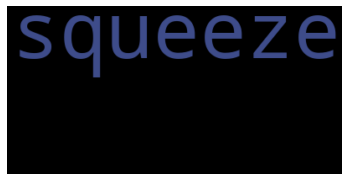

In [55]:
# Start with one review:
text = df.title[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

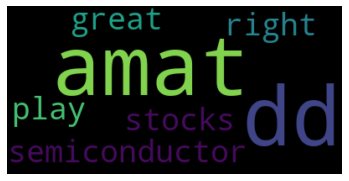

In [58]:
# 5 reviews:
text = df.title[5]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

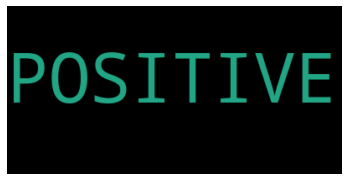

In [57]:
# 5 reviews:
text = df.sentiment_type[5]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Import our dependencies
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df1 = pd.read_csv(Path('sample_data/AAPL.csv'))
df1.head()

In [ ]:
plt.scatter(df1.Date, df1.Volume)
plt.xlabel('Date of sale')
plt.ylabel('Volume of AAPL')
plt.show()

In [ ]:
X = df1.Date.values.reshape(-1, 1)

In [ ]:
X[:5]

In [ ]:
X.shape

In [ ]:
y = df1.Volume

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)